In [11]:
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PROCESO DE EDA

In [5]:
key = 'plsBCUe5oAmxg3U275qupljZOtwGF4XPN6dgJgOi'
url_data = [f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-DEL-INTER-FIJO-51614/data.csv/?auth_key={key}',f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.csv/?auth_key={key}',f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/VELOC-PROME-DE-BAJAD-DE/data.csv/?auth_key={key}', f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-POR-LA-OPERA-DEL/data.csv/?auth_key={key}',f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/TOTAL-NACIO-DE-ACCES-32663/data.csv/?auth_key={key}']
accesos_internet = pd.read_csv(url_data[0])
accesos_tecnologia = pd.read_csv(url_data[1])
velocidad = pd.read_csv(url_data[2])
ingresos = pd.read_csv(url_data[3])
accesos_por_velocidad = pd.read_csv(url_data[4])

### Revisión de nulos

In [12]:
accesos_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           792 non-null    int64  
 1   Trimestre                     792 non-null    int64  
 2   Provincia                     792 non-null    object 
 3   Accesos por cada 100 hogares  792 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


In [13]:
accesos_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           793 non-null    object 
 1   Trimestre     793 non-null    object 
 2   Provincia     792 non-null    object 
 3   ADSL          792 non-null    float64
 4   Cablemodem    792 non-null    object 
 5   Fibra óptica  792 non-null    object 
 6   Wireless      792 non-null    object 
 7   Otros         792 non-null    float64
 8   Total         792 non-null    float64
dtypes: float64(3), object(6)
memory usage: 55.9+ KB


In [14]:
velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     792 non-null    int64  
 1   Trimestre               792 non-null    int64  
 2   Provincia               792 non-null    object 
 3   Mbps (Media de bajada)  792 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


In [32]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        34 non-null     int64 
 1   Trimestre                  34 non-null     int64 
 2   Ingresos (miles de pesos)  34 non-null     object
 3   Periodo                    34 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [6]:
accesos_por_velocidad.info()
accesos_por_velocidad = accesos_por_velocidad.drop(accesos_por_velocidad.columns[11], axis='columns')
accesos_por_velocidad

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      34 non-null     int64  
 1   Trimestre                34 non-null     int64  
 2   Hasta 512 kbps           34 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  34 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    34 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   34 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  34 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  34 non-null     object 
 8   Más de 30 Mbps           34 non-null     object 
 9   OTROS                    34 non-null     float64
 10  Total                    34 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.3+ KB


,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
1,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009
2,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794
3,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541
4,2021,2,40.172,42.024,2.531.271,1.080.279,693.277,647.401,4.661.291,167.369,9.863.084
5,2021,1,39.487,41.674,2.593.477,1.072.722,737.930,595.920,4.379.965,186.797,9.647.972
6,2020,4,39.510,42.185,2.622.638,1.073.875,786.595,582.420,4.239.237,185.102,9.571.562
7,2020,3,41.038,44.005,2.637.984,1.040.017,799.350,538.567,4.053.461,201.777,9.356.199
8,2020,2,41.038,48.690,2.651.502,1.053.107,807.775,523.437,3.711.499,194.008,9.031.056
9,2020,1,42.550,56.170,2.649.819,1.022.014,814.470,532.309,3.500.882,194.212,8.812.426


## Análisis de distribución de datos

<AxesSubplot:ylabel='count'>

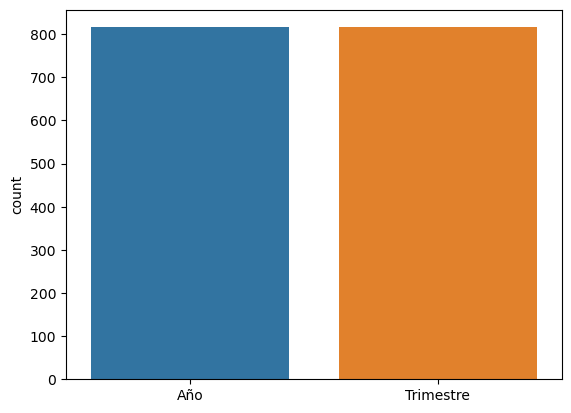

In [17]:
sns.countplot(accesos_internet)


<AxesSubplot:ylabel='count'>

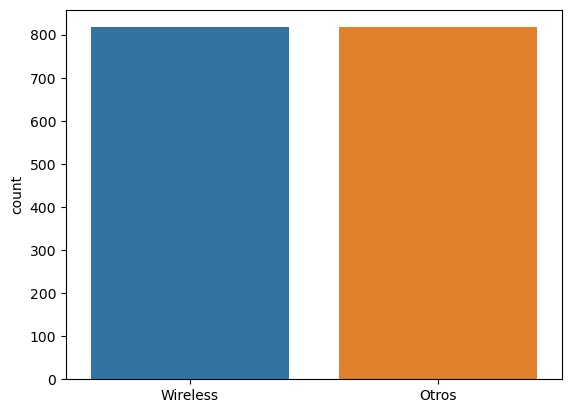

In [18]:
sns.countplot(accesos_tecnologia)

<AxesSubplot:ylabel='count'>

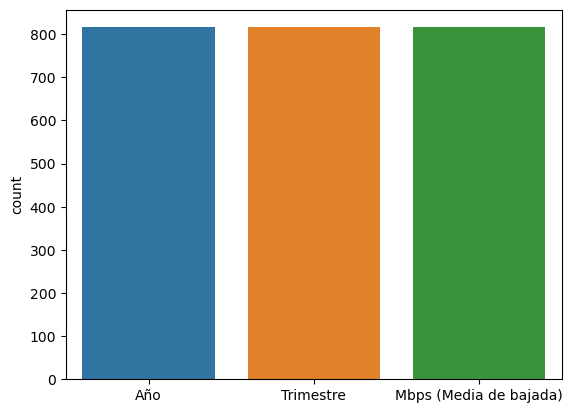

In [19]:
sns.countplot(velocidad)

<AxesSubplot:ylabel='count'>

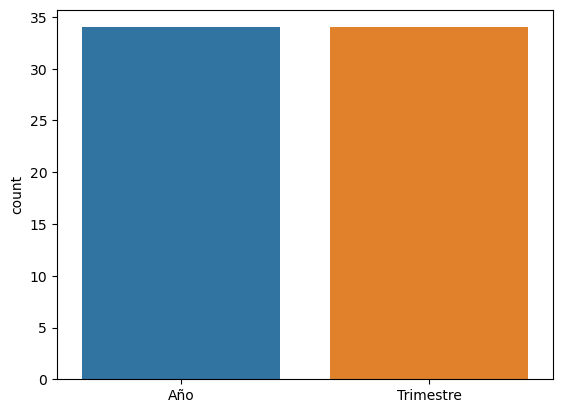

In [20]:
sns.countplot(ingresos)

<AxesSubplot:ylabel='count'>

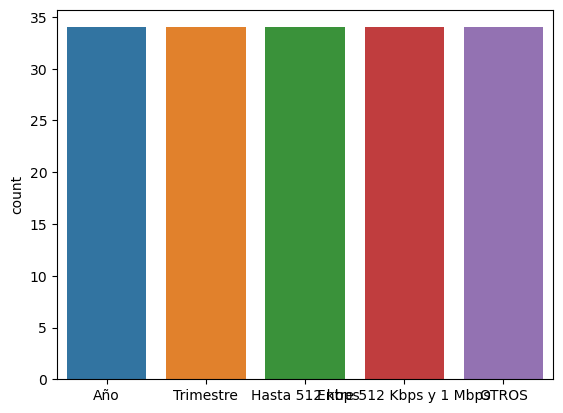

In [21]:
sns.countplot(accesos_por_velocidad)

<function matplotlib.pyplot.show(close=None, block=None)>

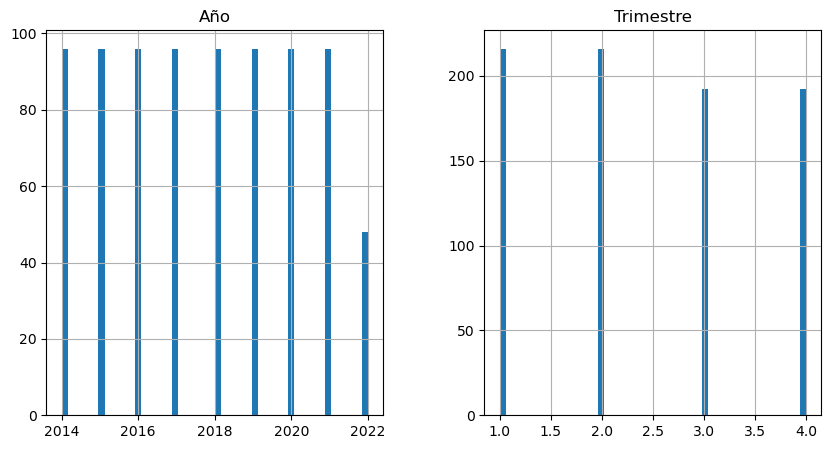

In [30]:
accesos_internet.hist(bins = 50, figsize = (10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

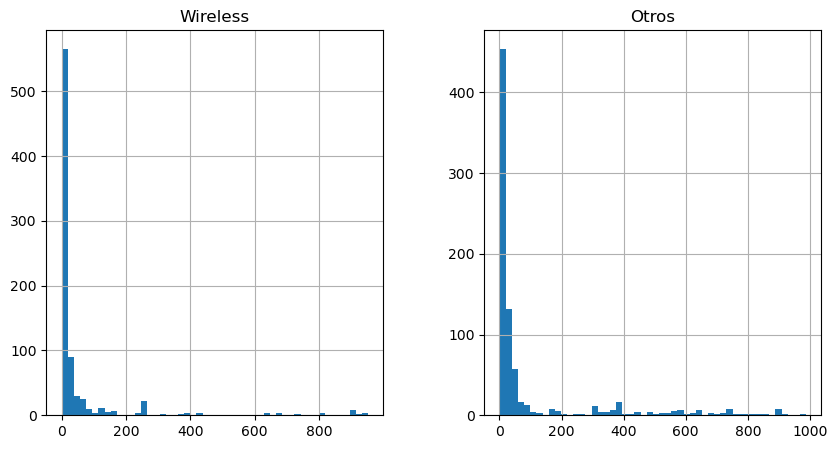

In [33]:
accesos_tecnologia.hist(bins = 50, figsize = (10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

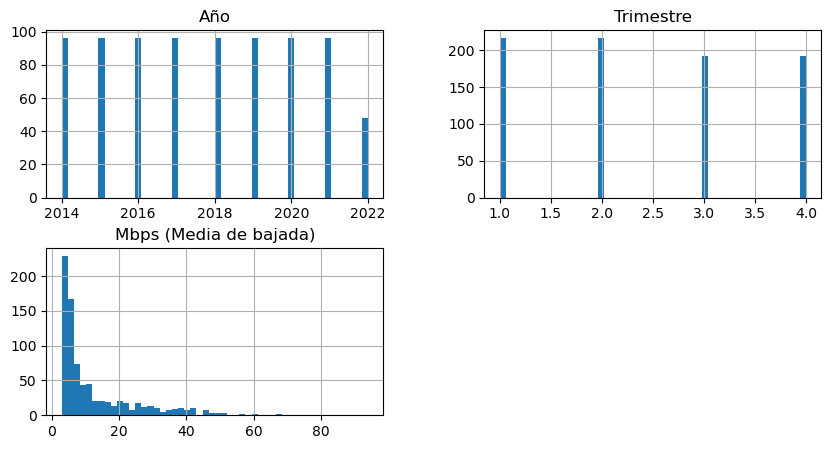

In [34]:
velocidad.hist(bins = 50, figsize = (10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

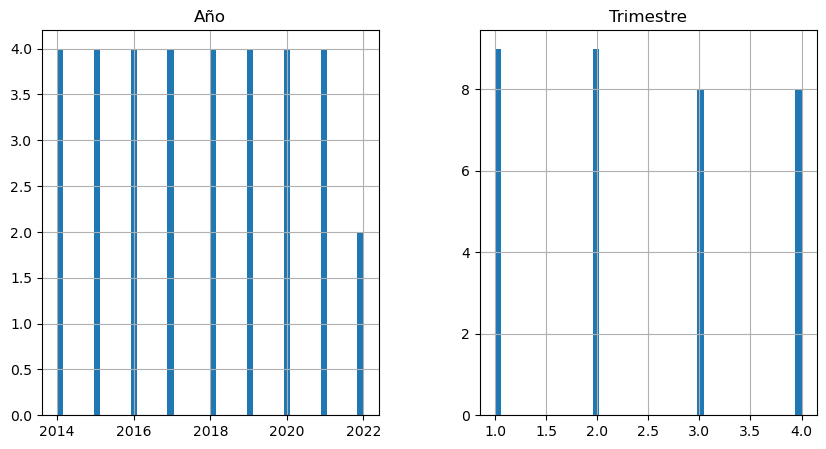

In [35]:
ingresos.hist(bins = 50, figsize = (10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

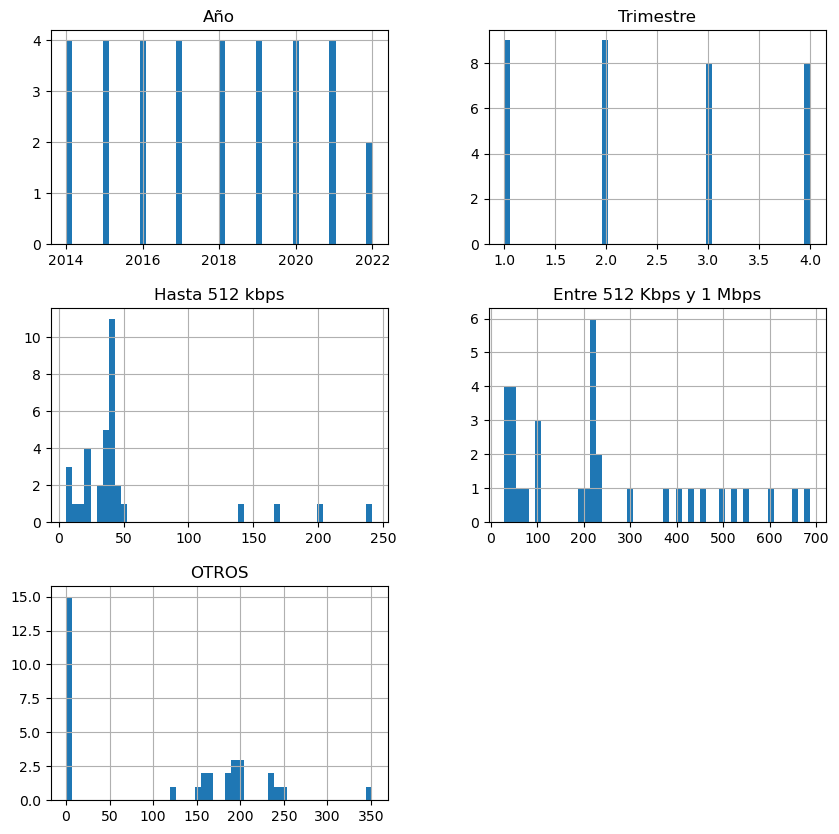

In [39]:
accesos_por_velocidad.hist(bins = 50, figsize = (10,10))
plt.show

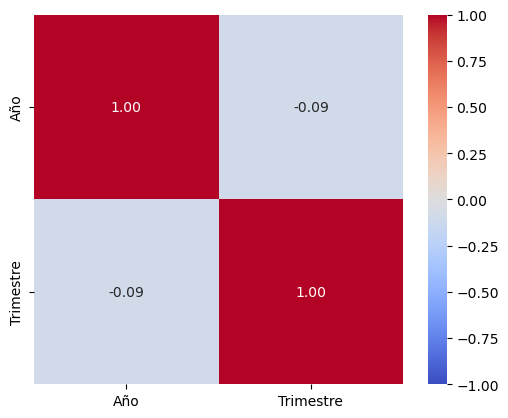

In [54]:
corr_matrix = accesos_internet.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cbar=True,
    fmt= '.2f',
    cmap= 'coolwarm',
    square=True,
    annot=True
)

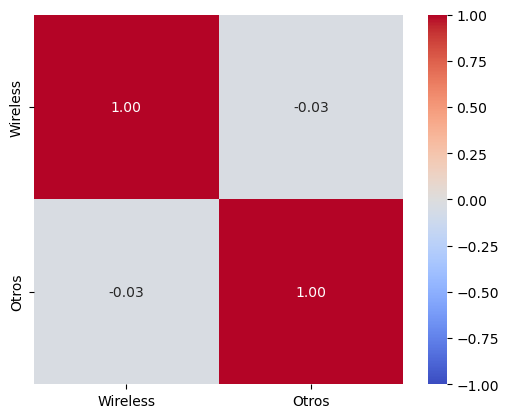

In [53]:
corr_matrix = accesos_tecnologia.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cbar=True,
    fmt= '.2f',
    cmap= 'coolwarm',
    square=True,
    annot=True
)

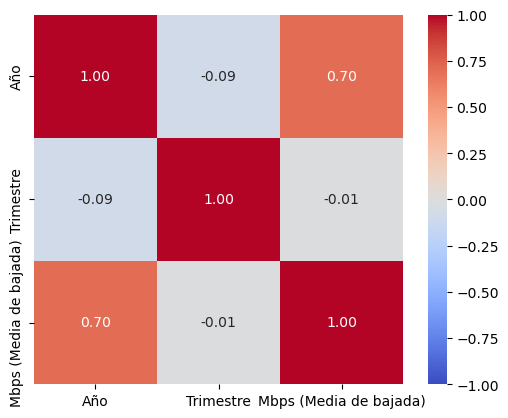

In [52]:
corr_matrix = velocidad.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cbar=True,
    fmt= '.2f',
    cmap= 'coolwarm',
    square=True,
    annot=True
)

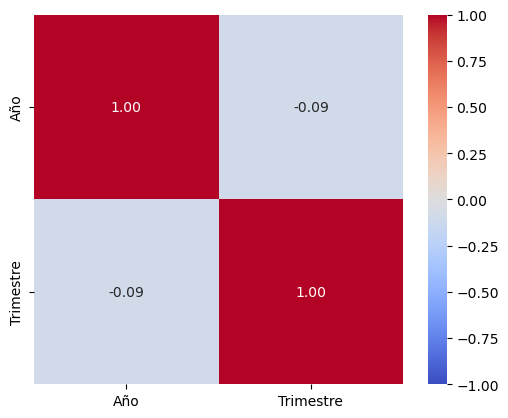

In [51]:
corr_matrix = ingresos.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cbar=True,
    fmt= '.2f',
    cmap= 'coolwarm',
    square=True,
    annot=True
)

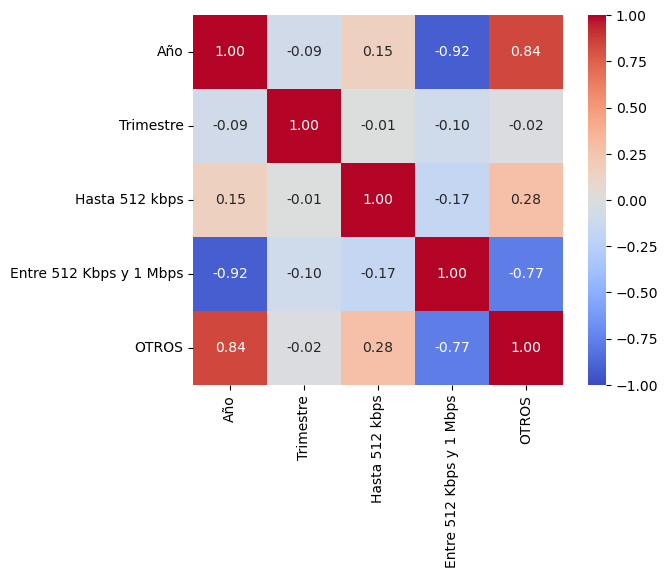

In [50]:
corr_matrix = accesos_por_velocidad.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cbar=True,
    fmt= '.2f',
    cmap= 'coolwarm',
    square=True,
    annot=True
)

# Conclusiones

- Los datos presentan distribuciones muy uniformes, algunos "sesgos" presentados en los rangos de velocidades son datos normales que por la variabilidad que tienen las redes, mantener los valores constantes se hace realmente difícil.

- Los datos tienen buen balance, no hay nulos, de manera que están completos y pueden ser analizados en el visualizador.

- Los posibles cambios que deban hacerse en los tipos de datos de columnas, cambios de mayúsculas, acentos y de más, se realizan dentro del PowerQuery.